In [1]:
#Classification Task with TensorFlow
#Identify and deal with overfitting through early stopping callbacks and dropout layers.
#Dropout Layers: Each dropout layer will drop a user-defined percentage of neuron units in the previous layer every batch

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The sav

In [3]:
df=pd.read_csv('DATA/cancer_classification.csv')

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
df.info()
#allows us to see the null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


C:\Users\hp\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

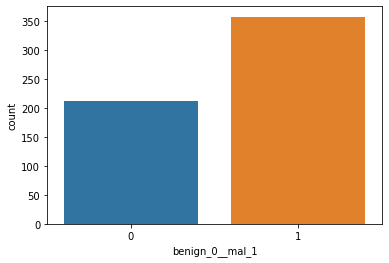

In [7]:
sns.countplot(df['benign_0__mal_1'])

In [10]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<AxesSubplot:>

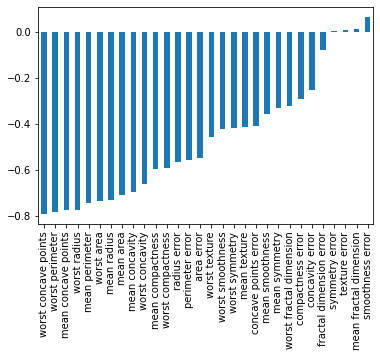

In [12]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

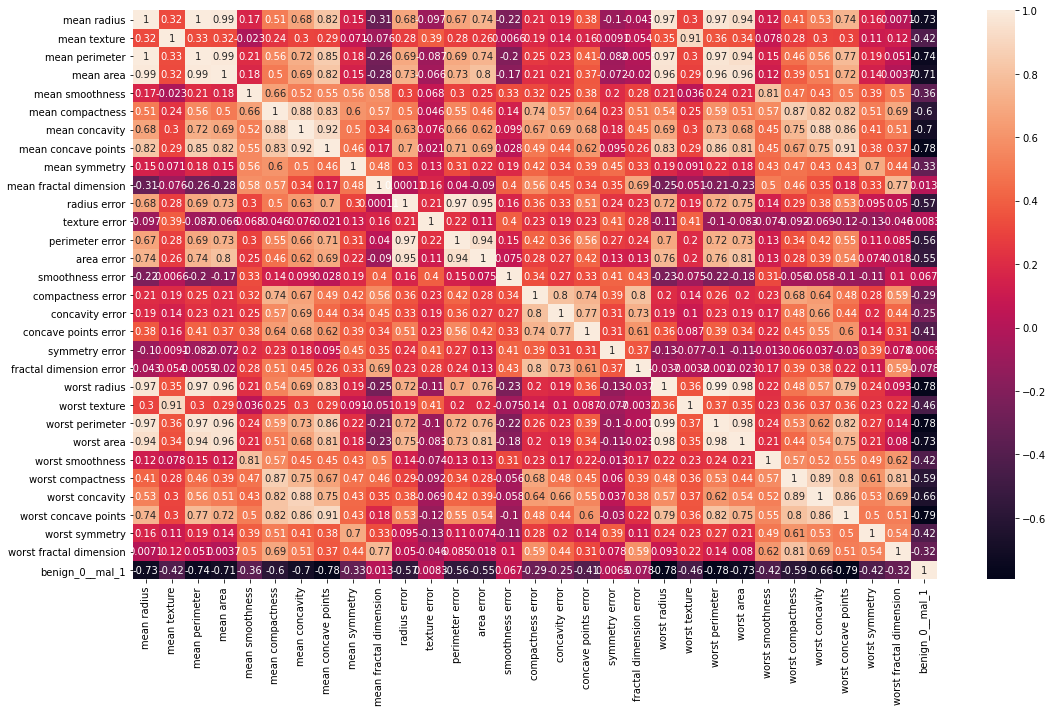

In [15]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True)
plt.tight_layout()

In [16]:
X=df.drop('benign_0__mal_1',axis=1).values
y=df['benign_0__mal_1'].values

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler=MinMaxScaler()

In [22]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [25]:
X_train.shape

(426, 30)

In [26]:
model=Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

model.add(Dense(1,activation='sigmoid'))     #for binary classification

model.compile(loss='binary_crossentropy',optimizer='adam')

In [27]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 2s 4ms/sample - loss: 0.6595 - val_loss: 0.6417
Epoch 2/600
426/426 [==============================] - 0s 196us/sample - loss: 0.6182 - val_loss: 0.5989
Epoch 3/600
426/426 [==============================] - 0s 216us/sample - loss: 0.5704 - val_loss: 0.5496
Epoch 4/600
426/426 [==============================] - 0s 238us/sample - loss: 0.5197 - val_loss: 0.4959
Epoch 5/600
426/426 [==============================] - 0s 226us/sample - loss: 0.4665 - val_loss: 0.4435
Epoch 6/600
426/426 [==============================] - 0s 229us/sample - loss: 0.4150 - val_loss: 0.3916
Epoch 7/600
426/426 [==============================] - 0s 222us/sample - loss: 0.3667 - val_loss: 0.3440
Epoch 8/600
426/426 [==============================] - 0s 225us/sample - loss: 0.3237 - val_loss: 0.3028
Epoch 9/600
426/426 [==============================] - 0s 216us/sample - loss: 0.2898 - val_loss: 0.2697
Epoch 10/60

426/426 [==============================] - 0s 244us/sample - loss: 0.0396 - val_loss: 0.1243
Epoch 154/600
426/426 [==============================] - 0s 258us/sample - loss: 0.0392 - val_loss: 0.1152
Epoch 155/600
426/426 [==============================] - 0s 262us/sample - loss: 0.0395 - val_loss: 0.1245
Epoch 156/600
426/426 [==============================] - 0s 245us/sample - loss: 0.0404 - val_loss: 0.1176
Epoch 157/600
426/426 [==============================] - 0s 241us/sample - loss: 0.0405 - val_loss: 0.1270
Epoch 158/600
426/426 [==============================] - 0s 237us/sample - loss: 0.0390 - val_loss: 0.1208
Epoch 159/600
426/426 [==============================] - 0s 249us/sample - loss: 0.0381 - val_loss: 0.1220
Epoch 160/600
426/426 [==============================] - 0s 241us/sample - loss: 0.0378 - val_loss: 0.1223
Epoch 161/600
426/426 [==============================] - 0s 242us/sample - loss: 0.0378 - val_loss: 0.1201
Epoch 162/600
426/426 [============================

426/426 [==============================] - 0s 189us/sample - loss: 0.0234 - val_loss: 0.1631
Epoch 306/600
426/426 [==============================] - 0s 206us/sample - loss: 0.0218 - val_loss: 0.1502
Epoch 307/600
426/426 [==============================] - 0s 195us/sample - loss: 0.0221 - val_loss: 0.1450
Epoch 308/600
426/426 [==============================] - 0s 250us/sample - loss: 0.0242 - val_loss: 0.1453
Epoch 309/600
426/426 [==============================] - 0s 194us/sample - loss: 0.0241 - val_loss: 0.1580
Epoch 310/600
426/426 [==============================] - 0s 231us/sample - loss: 0.0241 - val_loss: 0.1748
Epoch 311/600
426/426 [==============================] - 0s 222us/sample - loss: 0.0248 - val_loss: 0.1426
Epoch 312/600
426/426 [==============================] - ETA: 0s - loss: 0.021 - 0s 243us/sample - loss: 0.0229 - val_loss: 0.1636
Epoch 313/600
426/426 [==============================] - ETA: 0s - loss: 0.025 - 0s 254us/sample - loss: 0.0240 - val_loss: 0.1640
Epo

Epoch 381/600
426/426 [==============================] - 0s 219us/sample - loss: 0.0242 - val_loss: 0.2553
Epoch 382/600
426/426 [==============================] - 0s 237us/sample - loss: 0.0226 - val_loss: 0.1578
Epoch 383/600
426/426 [==============================] - 0s 252us/sample - loss: 0.0159 - val_loss: 0.1775
Epoch 384/600
426/426 [==============================] - 0s 273us/sample - loss: 0.0255 - val_loss: 0.1715
Epoch 385/600
426/426 [==============================] - 0s 247us/sample - loss: 0.0178 - val_loss: 0.1905
Epoch 386/600
426/426 [==============================] - 0s 276us/sample - loss: 0.0154 - val_loss: 0.1628
Epoch 387/600
426/426 [==============================] - 0s 425us/sample - loss: 0.0158 - val_loss: 0.2027
Epoch 388/600
426/426 [==============================] - 0s 274us/sample - loss: 0.0159 - val_loss: 0.1694
Epoch 389/600
426/426 [==============================] - 0s 290us/sample - loss: 0.0147 - val_loss: 0.1816
Epoch 390/600
426/426 [==============

426/426 [==============================] - 0s 175us/sample - loss: 0.0070 - val_loss: 0.2547
Epoch 534/600
426/426 [==============================] - 0s 171us/sample - loss: 0.0068 - val_loss: 0.2345
Epoch 535/600
426/426 [==============================] - 0s 164us/sample - loss: 0.0064 - val_loss: 0.2406
Epoch 536/600
426/426 [==============================] - 0s 211us/sample - loss: 0.0071 - val_loss: 0.2396
Epoch 537/600
426/426 [==============================] - ETA: 0s - loss: 0.028 - 0s 211us/sample - loss: 0.0063 - val_loss: 0.2456
Epoch 538/600
426/426 [==============================] - 0s 204us/sample - loss: 0.0062 - val_loss: 0.2400
Epoch 539/600
426/426 [==============================] - 0s 203us/sample - loss: 0.0063 - val_loss: 0.2580
Epoch 540/600
426/426 [==============================] - 0s 218us/sample - loss: 0.0064 - val_loss: 0.2254
Epoch 541/600
426/426 [==============================] - 0s 225us/sample - loss: 0.0067 - val_loss: 0.2722
Epoch 542/600
426/426 [====

In [28]:
model.history.history

{'loss': [0.6595396665340298,
  0.6182309428291142,
  0.5704082155451529,
  0.5197244429252517,
  0.4664729482411219,
  0.4149757016432677,
  0.3667105469905155,
  0.32368953924783517,
  0.2898032935292508,
  0.26109321352461695,
  0.24485618449712584,
  0.2322375627470688,
  0.2070349696936182,
  0.19281456042343462,
  0.17812761237643693,
  0.16609518838600373,
  0.16213139772694996,
  0.14777660278926993,
  0.13911531270949493,
  0.1305821660049085,
  0.12479437223062828,
  0.1193817685677412,
  0.11306830275226647,
  0.10949185658508623,
  0.10294794161834628,
  0.10097357189991105,
  0.09593510295443691,
  0.09412551192050808,
  0.08878930540921542,
  0.0859613042202354,
  0.08404174097267116,
  0.08115053103423454,
  0.07957613174344452,
  0.07889475243192323,
  0.08126948448553892,
  0.07519566829145795,
  0.07505027383146151,
  0.07731044742807816,
  0.07148450675984504,
  0.07906067219208664,
  0.07505050881332914,
  0.07055746743612935,
  0.0657409923544652,
  0.0668128902451

In [29]:
losses=pd.DataFrame(model.history.history)
losses.head()

,loss,val_loss
0,0.659540,0.641657
1,0.618231,0.598923
2,0.570408,0.549633
3,0.519724,0.495908
4,0.466473,0.443514


<AxesSubplot:>

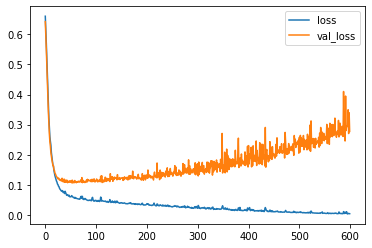

In [30]:
losses.plot()
#we are overfitting on the training data if the losses on validation data starts increasing during the training

In [31]:
#we will now explore the concept of early stoppings to stop the training before the val_loss gets out of hand

model=Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

model.add(Dense(1,activation='sigmoid'))     #for binary classification

model.compile(loss='binary_crossentropy',optimizer='adam')

In [32]:
#we will show how to use callbacks
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard

In [33]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored quantity has stopped improving.
 |  
 |  Arguments:
 |      monitor: Quantity to be monitored.
 |      min_delta: Minimum change in the monitored quantity
 |          to qualify as an improvement, i.e. an absolute
 |          change of less than min_delta, will count as no
 |          improvement.
 |      patience: Number of epochs with no improvement
 |          after which training will be stopped.
 |      verbose: verbosity mode.
 |      mode: One of `{"auto", "min", "max"}`. In `min` mode,
 |          training will stop when the quantity
 |          monitored has stopped decreasing; in `max`
 |          mode it will stop when the quantity
 |          monitored has stopped increasing; in `auto`
 |          mode, t

In [34]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25) 
#if the metric to monitored is accuracy we will use max modes

In [35]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 2s 5ms/sample - loss: 0.6973 - val_loss: 0.6600
Epoch 2/600
426/426 [==============================] - 0s 247us/sample - loss: 0.6537 - val_loss: 0.6250
Epoch 3/600
426/426 [==============================] - 0s 232us/sample - loss: 0.6136 - val_loss: 0.5888
Epoch 4/600
426/426 [==============================] - 0s 214us/sample - loss: 0.5732 - val_loss: 0.5440
Epoch 5/600
426/426 [==============================] - 0s 224us/sample - loss: 0.5249 - val_loss: 0.4971
Epoch 6/600
426/426 [==============================] - 0s 214us/sample - loss: 0.4769 - val_loss: 0.4493
Epoch 7/600
426/426 [==============================] - 0s 213us/sample - loss: 0.4283 - val_loss: 0.4011
Epoch 8/600
426/426 [==============================] - 0s 235us/sample - loss: 0.3850 - val_loss: 0.3560
Epoch 9/600
426/426 [==============================] - 0s 235us/sample - loss: 0.3441 - val_loss: 0.3148
Epoch 10/60

<AxesSubplot:>

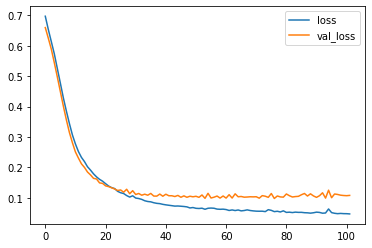

In [36]:
model_loss=pd.DataFrame(model.history.history)
model_loss.plot()
#early stopping has prevented overfitting

In [37]:
from tensorflow.keras.layers import Dropout

In [38]:
#the other thing we can do to prevent overfitting is to add dropout layers. It will turn off percentage of neurons randomly

model=Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))     #for binary classification

model.compile(loss='binary_crossentropy',optimizer='adam')

In [39]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 2s 5ms/sample - loss: 0.6895 - val_loss: 0.6545
Epoch 2/600
426/426 [==============================] - 0s 251us/sample - loss: 0.6627 - val_loss: 0.6393
Epoch 3/600
426/426 [==============================] - 0s 206us/sample - loss: 0.6614 - val_loss: 0.6262
Epoch 4/600
426/426 [==============================] - 0s 219us/sample - loss: 0.6402 - val_loss: 0.6077
Epoch 5/600
426/426 [==============================] - 0s 223us/sample - loss: 0.6209 - val_loss: 0.5881
Epoch 6/600
426/426 [==============================] - 0s 230us/sample - loss: 0.6152 - val_loss: 0.5694
Epoch 7/600
426/426 [==============================] - 0s 200us/sample - loss: 0.5880 - val_loss: 0.5487
Epoch 8/600
426/426 [==============================] - 0s 225us/sample - loss: 0.5708 - val_loss: 0.5249
Epoch 9/600
426/426 [==============================] - 0s 223us/sample - loss: 0.5520 - val_loss: 0.4968
Epoch 10/60

<AxesSubplot:>

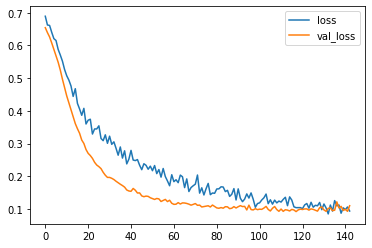

In [40]:
model_loss=pd.DataFrame(model.history.history)
model_loss.plot()

More on dropout layers: https://towardsdatascience.com/understanding-and-implementing-dropout-in-tensorflow-and-keras-a8a3a02c1bfa

In [42]:
predictions=model.predict_classes(X_test)   #predictions for binary classes

In [43]:
from sklearn.metrics import classification_report,confusion_matrix
#we import these from metrics for classification tasks

In [44]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        55
           1       0.99      0.95      0.97        88

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



In [45]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 4 84]]
